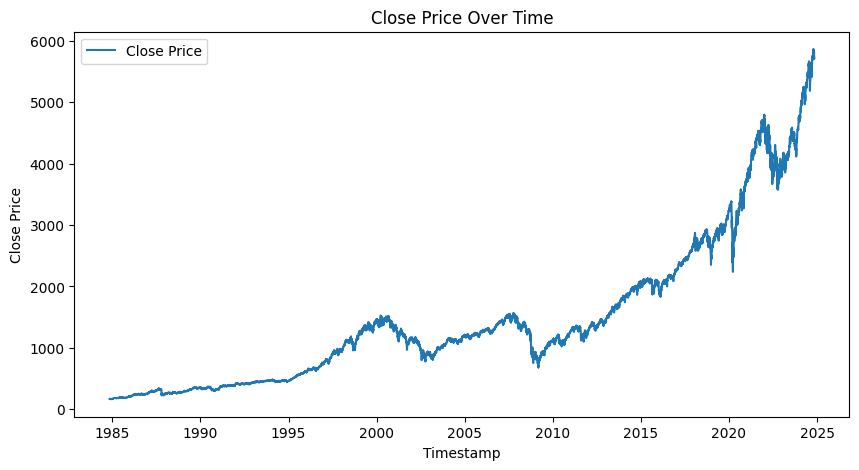

In [88]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
df['Timestamp'] = df['Timestamp'].apply(lambda x: datetime.fromtimestamp(x / 1000))

# filter out data older than 40 years ago
df = df[df['Timestamp'] > datetime.now().replace(year=datetime.now().year - 40)]

plt.figure(figsize=(10, 5))
plt.plot(df['Timestamp'], df['Close'], label='Close Price')
plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.legend()
plt.show()

In [70]:
dropToRecoverFrom = 40

Quanto devo aspettare per poter sostenere un drop del `dropToRecoverFrom`%? Ossia avere il mio capitale iniziale "garantito"?

In [89]:
start_timestamps = []
end_timestamps = []

for entry in df.itertuples(index=True):
    investment = entry.Open
    if investment == 0:
        continue
    future_rows = df.loc[entry.Index+1:]
    for next_entry in future_rows.itertuples(index=True):
        if next_entry.Open - (next_entry.Open * dropToRecoverFrom / 100) >= investment:
            start_timestamps.append(entry.Timestamp)
            end_timestamps.append(next_entry.Timestamp)
            break

results_df = pd.DataFrame({
    'startTimestamp': start_timestamps,
    'endTimestamp': end_timestamps
})

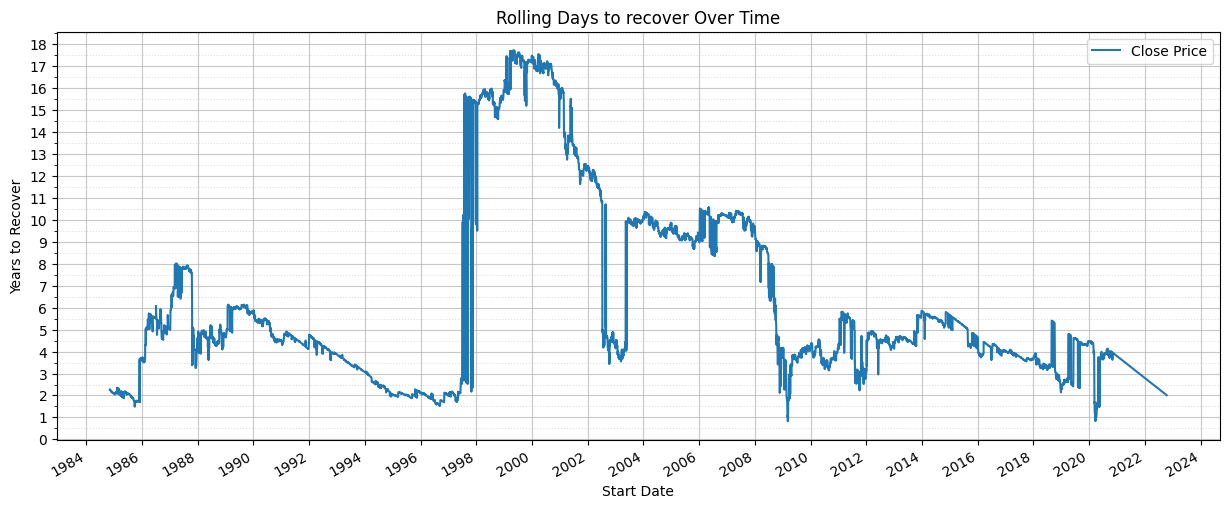

In [90]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

results_df['Difference'] = (results_df['endTimestamp'] - results_df['startTimestamp']).dt.days / 365

plt.figure(figsize=(15, 6))
plt.plot(results_df['startTimestamp'], results_df['Difference'], label='Close Price')

ax = plt.gca()
ax.yaxis.set_major_locator(plt.MultipleLocator(1))  # Set major ticks every 0.5 years
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))  # Set minor ticks every 0.1 years
ax.grid(True, which='major', linestyle='-', alpha=0.7)
ax.grid(True, which='minor', linestyle=':', alpha=0.4)

ax.xaxis.set_major_locator(mdates.YearLocator(2))  # Show every 2 years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as year only
plt.gcf().autofmt_xdate()  

plt.xlabel('Start Date')
plt.ylabel('Years to Recover')
plt.title('Rolling Days to recover Over Time')
plt.legend()
plt.show()

In [91]:
mean = results_df['Difference'].mean()
variance = results_df['Difference'].var()
std_dev = results_df['Difference'].std()

print(f'Mean: {mean:.2f}')
print(f'Variance: {variance:.2f}')
print(f'Standard Deviation: {std_dev:.2f}')

# Histogram

# plt.figure(figsize=(10, 6))
# plt.hist(results_df['Difference'], bins=20, edgecolor='black')
# plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f} years')
# plt.xlabel('Years to Recover')
# plt.ylabel('Frequency')
# plt.title('Distribution of Recovery Times')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.show()


Mean: 6.37
Variance: 17.68
Standard Deviation: 4.20


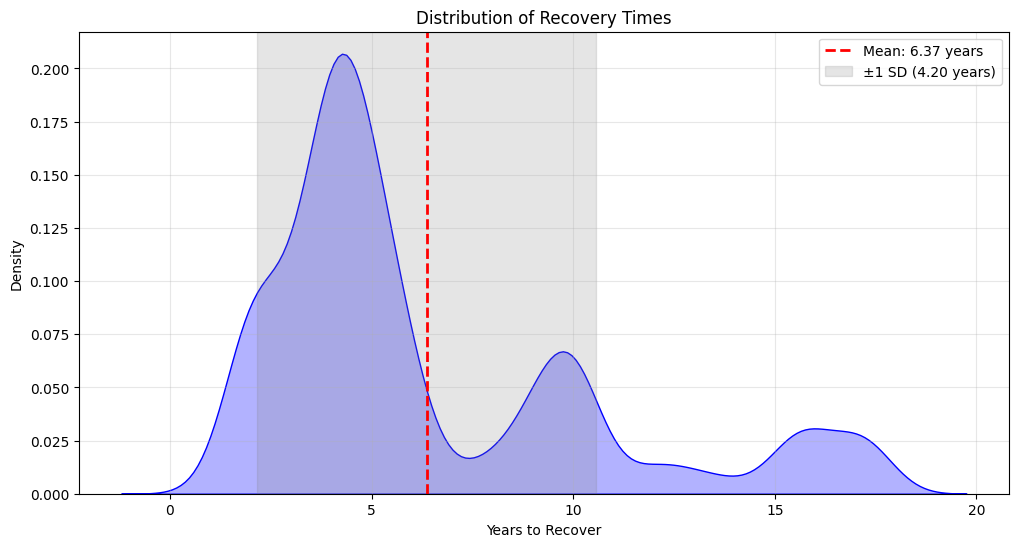

In [92]:
import seaborn as sns

plt.figure(figsize=(12, 6))

# Create density plot
sns.kdeplot(data=results_df['Difference'], 
            color='blue',
            fill=True,
            alpha=0.3)

# Add mean line
plt.axvline(mean, color='red', 
            linestyle='dashed', 
            linewidth=2, 
            label=f'Mean: {mean:.2f} years')

# Add standard deviation range
plt.axvspan(mean - std_dev, mean + std_dev, 
            alpha=0.2, 
            color='gray', 
            label=f'±1 SD ({std_dev:.2f} years)')

plt.xlabel('Years to Recover')
plt.ylabel('Density')
plt.title('Distribution of Recovery Times')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()